## The Customer Cube

If the ARR calc is looking good, then it's time to aggregate everything. That's where the customer cube comes into play.

>*The loftier the building, the deeper must the foundation be laid.*
>
>   \- Thomas A Kempis

Jumping too quickly into the customer cube, can lead to issues. Start small and dive into the *what if* scenarios of your data. Make sure you can easily adjust your ARR calc especially for a company that is new to the idea.

### What is a Customer Cube?

A customer cube, at the very least, is ARR by month by customer by product. In terms of a visual, it's a matrix. Months as your column headers, ARR as your values, & everything else nested as your row headers.

| | |2024-01-31|2024-02-29|2024-03-31|2024-04-30|2024-05-31|2024-06-30|2024-07-31|
|---|---|---|---|---|---|---|---|---|
|Customer #1|Product #1|10,000|10,000|10,000|10,000|10,000|10,000|10,000|
|Customer #1|Product #2|8,000|8,000|8,000|8,000|8,000|8,000|8,000|
|Customer #2|Product #1|10,000|10,000|10,000|0|0|0|0|
|Customer #2|Product #2|8,000|8,000|8,000|0|0|0|0|
|Customer #2|Product #3|0|0|0|5,000|5,000|5,000|5,000|
|Customer #2|Product #4|0|0|0|12,000|12,000|12,000|12,000|
|Customer #3|Product #1|10,000|10,000|10,000|10,000|10,000|10,000|10,000|

In practice, this visual is easily presented from a classic star schema fact table in your data model.

|date_key|customer_key|product_key|arr|
|---|---|---|---|
|20240131|1|1|10000|
|20240229|1|1|10000|
|20240331|1|1|10000|
|20240430|1|1|10000|
|20240531|1|1|10000|
|20240630|1|1|10000|
|20240131|1|2|8000|
|20240229|1|2|8000|
|20240331|1|2|8000|
|...|...|...|...|
|20240531|3|1|10000|
|20240630|3|1|10000|

As your cube matures and requirements grow, it's natural for this cube to take on more datapoints and categorizations. Slap a key in the fact table and *build*.

<div class="alert alert-block alert-info">
I'll not be covering star schema. <a href="https://chrisadamson.com/star-schema-complete-reference/">Chris Adamson</a> does a much better job. Adamson lays out the technical, but with a lens of practicality. He conveys how data professionals will be involved in many decisions. These decisions are <i>business decisions</i> with <i>technical implications</i>.

One more time for the back of the room... <i>Business decisions</i> with <i>technical implications</i>. It's likely your data model will have issues, and sometimes, that's okay. These decisions will be made, whether yours or someone elses, to build in a sub-optimal way. You will constantly deal with resource, knowledge, time, cost, and political restraints. So, it's important to know when the technical implication (tech debt) is okay to take on and when it's not.

So, it's a great a thought by Adamson. Not just for data modelling, but for life. We're not perfect and neither is your data model.
</div>


### SaaS Corp LLC

Instead of writing a billion individual `Contract` dataclasses, I've created a fake company called *SaaS Corp LLC*. See the `build_contracts.py` file for how it was all generated.

In [3]:
from arr import Contract
from data.build_contracts import CONTRACTS

display(CONTRACTS.sample(10))
example = Contract.from_df(CONTRACTS[CONTRACTS['id'] == 121])
example

,id,customer,header.amount,header.start_date,header.end_date,header.booking_date,line.amount,line.start_date,line.end_date,line.product,line.renewable
243,255,Demivee,51000,2025-02-06,2026-02-05,2025-02-06,10000,2025-02-06,2026-02-05,VPN,True
767,131,Buzzbean,6500,2024-01-24,2025-01-23,2024-01-24,6500,2024-01-24,2025-01-23,SCM,True
813,8,Jabberbean,63500,2020-02-03,2020-08-02,2020-02-03,7500,2020-02-03,2020-08-02,DevOps,True
329,234,Photobug,41000,2022-12-06,2025-12-05,2022-12-06,10000,2022-12-06,2025-12-05,BI,True
170,274,Snaptags,16000,2025-02-13,2026-02-12,2025-02-13,7500,2025-02-13,2026-02-12,DevOps,True
1157,81,Gabcube,88000,2021-08-06,2022-08-05,2021-08-06,13000,2021-08-06,2022-08-05,LMS,True
299,244,Trudoo,54000,2023-12-21,2025-12-20,2023-12-21,5000,2023-12-21,2025-12-20,DMS,True
101,286,Edgeclub,20000,2026-11-05,2027-11-04,2026-11-05,8500,2026-11-05,2027-11-04,ITS,True
1046,58,Fanoodle,47000,2026-02-14,2026-05-13,2026-02-14,13000,2026-02-14,2026-05-13,LMS,True
1099,71,Ntag,28500,2020-01-19,2022-01-18,2020-01-19,10000,2020-01-19,2022-01-18,VPN,True


                          Youspan                           
            Contract #121 - $13,000 - 2024-09-26            
                  2024-09-26 - 2025-09-25                   
************************************************************
product	start date	end date	amount	renewable
************************************************************
HRIS	2024-09-26	2025-09-25	$13,000	True
************************************************************

<Axes: title={'center': 'ARR over Time'}, xlabel='period'>

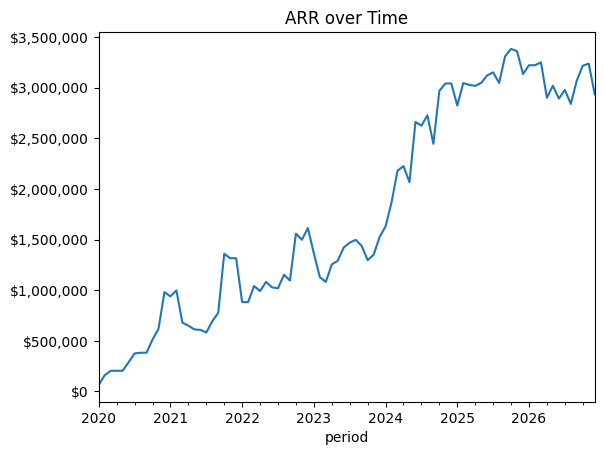

In [4]:
from arr import annualize_df
import pandas as pd
import matplotlib as mpl

df = annualize_df(CONTRACTS)
a: pd.Series = df['ARR'].sum()
ax = a.loc['2020-01-31':'2026-12-31'].plot()
ax.get_yaxis().set_major_formatter(
    mpl.ticker.StrMethodFormatter('${x:,.0f}')
)
ax.set_title('ARR over Time')
ax